https://www.kaggle.com/kstaud85/iris-data-visualization

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
%matplotlib inline

In [44]:
import matplotlib
matplotlib.__version__

'2.2.2'

In [2]:
feature_names = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', "target"]
df = pd.read_csv("dataset/iris.data.txt", sep=",", header=None, names=feature_names)

In [3]:
le = LabelEncoder() # le stand for Label Encoder
#df["target2"] = le.fit_transform(df.iloc[:, 4]) # you need iloc here, because 4 is not a feature name
df["target2"] = le.fit_transform(df["target"]) # same as above

In [4]:
df.shape

(150, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
target               150 non-null object
target2              150 non-null int32
dtypes: float64(4), int32(1), object(1)
memory usage: 6.5+ KB


In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target2
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [7]:
df.loc[[30,70,120], :]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target2
30,4.8,3.1,1.6,0.2,Iris-setosa,0
70,5.9,3.2,4.8,1.8,Iris-versicolor,1
120,6.9,3.2,5.7,2.3,Iris-virginica,2


In [8]:
def plot_histogram(var):
    if var.dtype == "object":
        plt.bar(var.value_counts().index, var.value_counts().values)
        plt.title("Barplot of " + var.name)
        plt.xlabel(var.name)
        plt.ylabel("# counts")
        plt.show()
    else:
        plt.hist(var, bins=20)
        plt.title("Histogram of " + var.name)
        plt.xlabel(var.name)
        plt.ylabel("# entries")
        plt.show()

### Univariate Plots : Histogram, Barplot

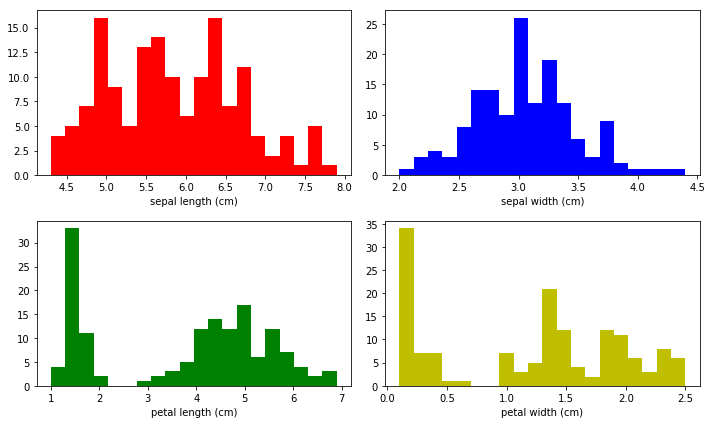

In [58]:
fig = plt.figure(1, figsize=(10,6))
axes = fig.subplots(nrows=2, ncols=2)
axes[0,0].hist(df.iloc[:,0], bins=20, color="r")
axes[0,0].set_xlabel(df.iloc[:,0].name)

axes[0,1].hist(df.iloc[:,1], bins=20, color="b")
axes[0,1].set_xlabel(df.iloc[:,1].name)

axes[1,0].hist(df.iloc[:,2], bins=20, color="g")
axes[1,0].set_xlabel(df.iloc[:,2].name)

axes[1,1].hist(df.iloc[:,3], bins=20, color="y")
axes[1,1].set_xlabel(df.iloc[:,3].name)
plt.tight_layout()
plt.show()

<b> this clearly shows that petal length may distinguish between three species </b>

In [59]:
#plot_histogram(df.iloc[:,0])

In [60]:
#plot_histogram(df.iloc[:,1])

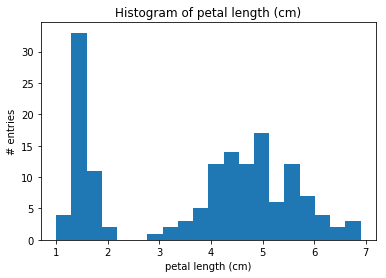

In [11]:
plot_histogram(df.iloc[:,2])

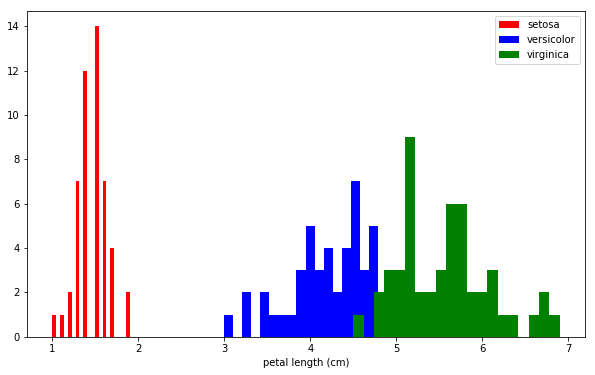

In [82]:
plt.figure(figsize=(10,6))
plt.hist(df.loc[df["target"]=="Iris-setosa", "petal length (cm)"], bins=20, color="r", label="setosa")
plt.hist(df.loc[df["target"]=="Iris-versicolor", "petal length (cm)"], bins=20, color="b", label="versicolor")
plt.hist(df.loc[df["target"]=="Iris-virginica", "petal length (cm)"], bins=20, color="g", label="virginica")
plt.xlabel(df["petal length (cm)"].name)
plt.legend(loc="upper right")
plt.show()

In [61]:
#plot_histogram(df.iloc[:,3])

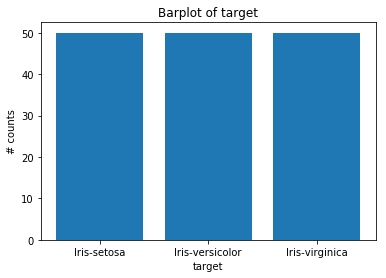

In [13]:
plot_histogram(df.iloc[:,4]) 
# this is converting categorical labels to integer and then plotting, best suited for barplot, 
#see y-axis is normalized to 1

#### value_counts, get its index and values

In [14]:
df["target"].dtype == "object"

True

In [15]:
type(df.iloc[:, 4].value_counts()) # this is pandas series

pandas.core.series.Series

In [16]:
df.iloc[:, 4].value_counts().index

Index(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='object')

In [17]:
df.iloc[:, 4].value_counts().values

array([50, 50, 50], dtype=int64)

In [18]:
df.iloc[:, 4].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: target, dtype: int64

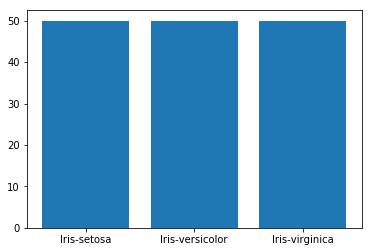

In [19]:
plt.bar(df.iloc[:, 4].value_counts().index, df.iloc[:, 4].value_counts().values)
plt.show()

In [20]:
df.iloc[:, 5].value_counts()

2    50
1    50
0    50
Name: target2, dtype: int64

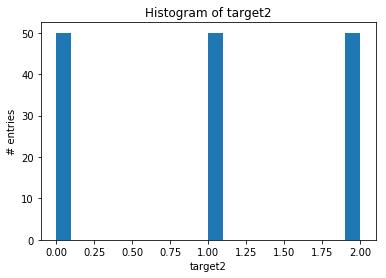

In [21]:
plot_histogram(df.iloc[:,5])

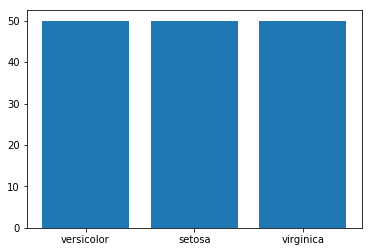

In [22]:
#plot_histogram(df.iloc[:,5])
plt.bar(df.iloc[:, 5].value_counts().index, df.iloc[:, 5].value_counts().values)
plt.xticks(df.iloc[:, 5].value_counts().index, ("virginica", "setosa", "versicolor")) # changed the labels
plt.show()

#### Bivariate Plots : scatter plot

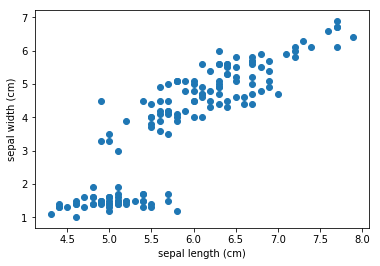

In [23]:
# plot of petal length (Y) vs. sepal length (X)
plt.scatter(df.iloc[:, 0], df.iloc[:, 2])
plt.xlabel(df.iloc[:,0].name)
plt.ylabel(df.iloc[:,1].name)
plt.show()

In [24]:
setosa = df.loc[df["target"]=="Iris-setosa", ["sepal length (cm)", "petal length (cm)"]]
versicolor = df.loc[df["target"]=="Iris-versicolor", ["sepal length (cm)", "petal length (cm)"]]
virginica = df.loc[df["target"]=="Iris-virginica", ["sepal length (cm)", "petal length (cm)"]]

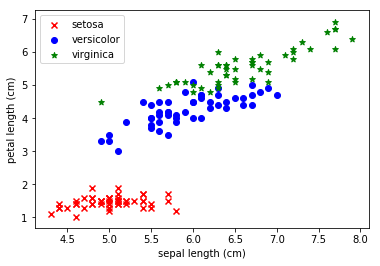

In [25]:
plt.scatter(setosa.iloc[:,0], setosa.iloc[:,1], color="red", marker="x", label="setosa")
plt.scatter(versicolor.iloc[:,0], versicolor.iloc[:,1], color="blue", marker="o", label="versicolor")
plt.scatter(virginica.iloc[:,0], virginica.iloc[:,1], color="green", marker="*", label="virginica")
plt.xlabel(setosa.iloc[:,0].name)
plt.ylabel(setosa.iloc[:,1].name)
plt.legend(loc="upper left")
plt.show()

#### Introduction to seaborn

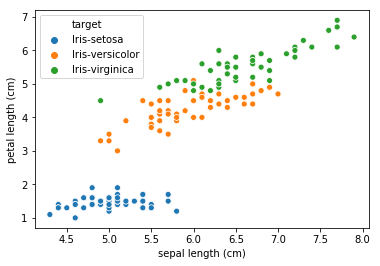

In [26]:
sns.scatterplot(x="sepal length (cm)", y="petal length (cm)", hue="target", data=df)

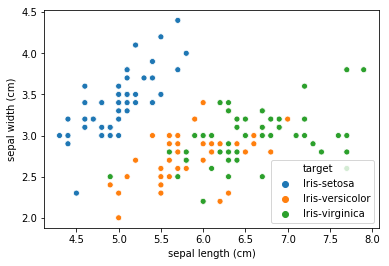

In [27]:
sns.scatterplot(x="sepal length (cm)", y="sepal width (cm)", hue="target", data=df)

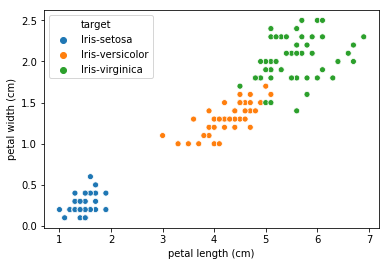

In [28]:
sns.scatterplot(x="petal length (cm)", y="petal width (cm)", hue="target", data=df)

### Box plots

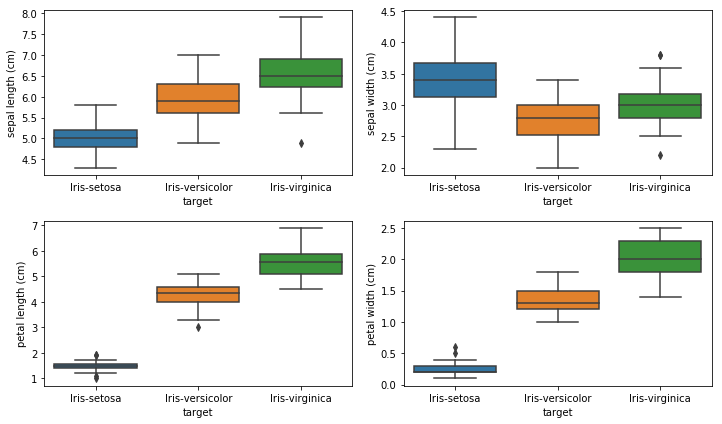

In [42]:
plt.figure(1, figsize=(10,6))
plt.subplot(2,2,1)
sns.boxplot(x="target", y="sepal length (cm)", data=df)
plt.subplot(2,2,2)
sns.boxplot(x="target", y="sepal width (cm)", data=df)
plt.subplot(2,2,3)
sns.boxplot(x="target", y="petal length (cm)", data=df)
plt.subplot(2,2,4)
sns.boxplot(x="target", y="petal width (cm)", data=df)
plt.tight_layout()
plt.show()

<b> this clearly shows that petal length and petal width are features clearly separate three target labels. </b>

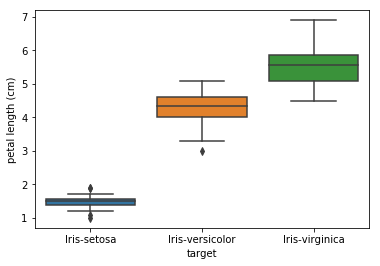

In [39]:
sns.boxplot(x="target", y="petal length (cm)", data=df)
plt.show()

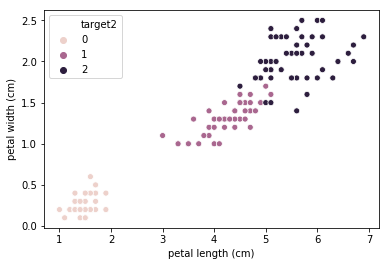

In [29]:
sns.scatterplot(x="petal length (cm)", y="petal width (cm)", hue="target2", data=df)